<a href="https://colab.research.google.com/github/surajacharya12/farming-app/blob/main/plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assume 'potato' is the directory containing image subfolders (e.g., 'potato/healthy', 'potato/diseased')


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS =50

In [ ]:
dataset_path = '/content/drive/My Drive/potato'


In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)


Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 2 1 1 1 0 1 1 0 1 0 0 1 0 0 2 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[225. 206. 208.]
  [187. 168. 170.]
  [198. 179. 181.]
  ...
  [163. 150. 157.]
  [147. 134. 141.]
  [171. 158. 165.]]

 [[228. 209. 211.]
  [189. 170. 172.]
  [185. 166. 168.]
  ...
  [180. 167. 174.]
  [159. 146. 153.]
  [179. 166. 173.]]

 [[170. 151. 153.]
  [198. 179. 181.]
  [198. 179. 181.]
  ...
  [179. 166. 173.]
  [159. 146. 153.]
  [156. 143. 150.]]

 ...

 [[163. 150. 159.]
  [163. 150. 159.]
  [164. 151. 160.]
  ...
  [167. 154. 164.]
  [167. 154. 164.]
  [167. 154. 164.]]

 [[160. 147. 156.]
  [161. 148. 157.]
  [163. 150. 159.]
  ...
  [166. 153. 163.]
  [165. 152. 162.]
  [166. 153. 163.]]

 [[177. 164. 173.]
  [177. 164. 173.]
  [177. 164. 173.]
  ...
  [168. 155. 165.]
  [167. 154. 164.]
  [167. 154. 164.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

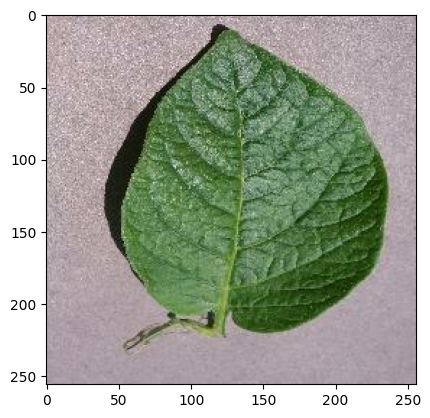

In [ ]:
plt.imshow(image_batch[0].numpy().astype("uint8"))

Text(0.5, 1.0, 'Potato___healthy')

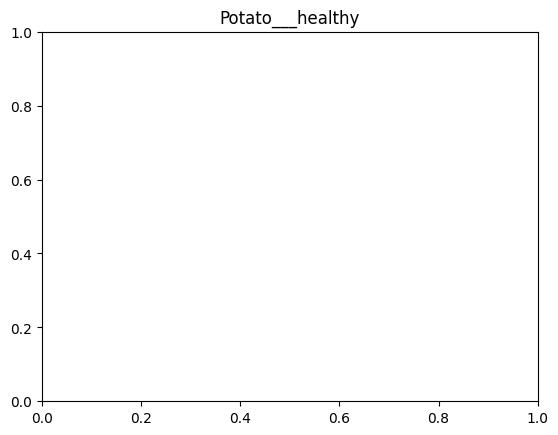

In [ ]:
plt.title(class_names[labels_batch[0]])

In [ ]:
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

ValueError: num must be an integer with 1 <= num <= 12, not 13

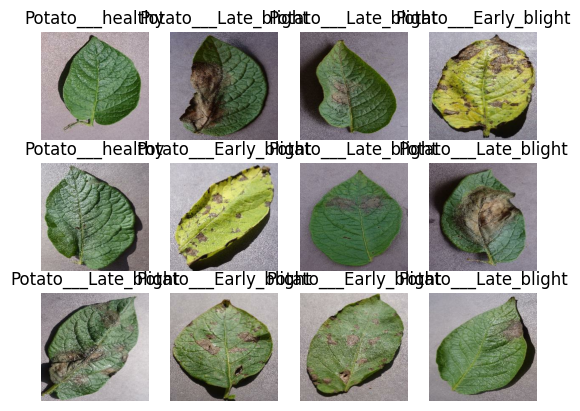

In [ ]:
for i in range(len(image_batch)):  # Iterate through images in the batch
    ax = plt.subplot(3, 4, i + 1)  # Create subplot for each image
    plt.imshow(image_batch[i].numpy().astype("uint8"))  # Display the image
    plt.title(class_names[labels_batch[i]])  # Set title with class name
    plt.axis("off")  # Hide axis

plt.show()  # Sho

In [ ]:
len(dataset)

68

In [ ]:
total_batches = len(dataset)

# Calculate the number of batches for each split
train_batches = int(total_batches * 0.8)  # 80% for training
val_batches = int(total_batches * 0.1)  # 10% for validation
test_batches = total_batches - train_batches - val_batches  # Remaining for testing

# Split the dataset using take() and skip()
train_dataset = dataset.take(train_batches)
val_dataset = dataset.skip(train_batches).take(val_batches)
test_dataset = dataset.skip(train_batches + val_batches).take(test_batches)

print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

Training dataset size: 54
Validation dataset size: 6
Test dataset size: 8


In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    return train_ds, val_ds, test_ds

In [ ]:
get_dataset_partitions_tf(dataset)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

resize_and_rescale = keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize first
    layers.Rescaling(1./255)  # Then rescale
])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 449s 5s/step - accuracy: 0.4712 - loss: 0.9505 - val_accuracy: 0.5625 - val_loss: 0.8797
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 312s 5s/step - accuracy: 0.6167 - loss: 0.7985 - val_accuracy: 0.7708 - val_loss: 0.4760
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.7047 - loss: 0.6604 - val_accuracy: 0.8333 - val_loss: 0.3478
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.8327 - loss: 0.4174 - val_accuracy: 0.9219 - val_loss: 0.2023
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.8796 - loss: 0.3247 - val_accuracy: 0.9219 - val_loss: 0.2275
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.8952 - loss: 0.2760 - val_accuracy: 0.9010 - val_loss: 0.2369
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.9263 - loss: 0.2152 - val_accuracy: 0.8333 - val_loss: 0.4270
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9519 - loss: 0.1318 - val_accuracy: 0.8542 - v

In [ ]:
score =model.evaluate(test_ds)
score

8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9871 - loss: 0.0295


[0.02324885129928589, 0.9913793206214905]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

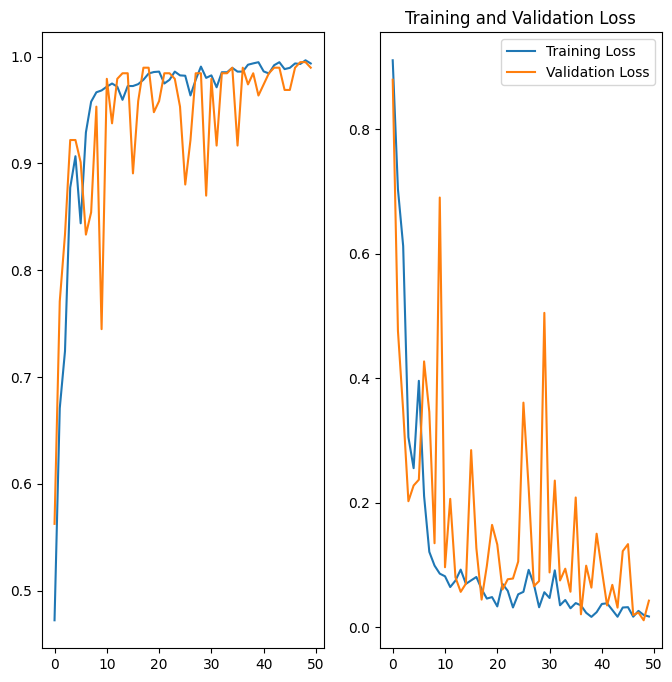

In [ ]:
# ... (your previous code) ...

# After training the model:


# Assign values:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Now you can plot:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
# ... (rest of your plotting code) ...

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Early_blight


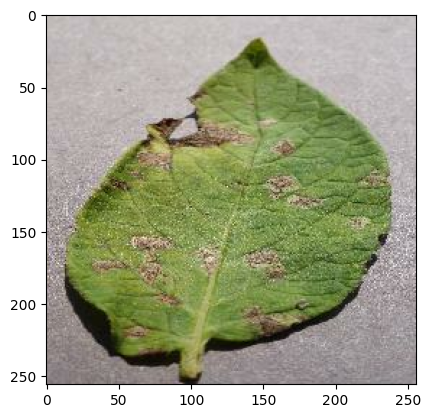

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


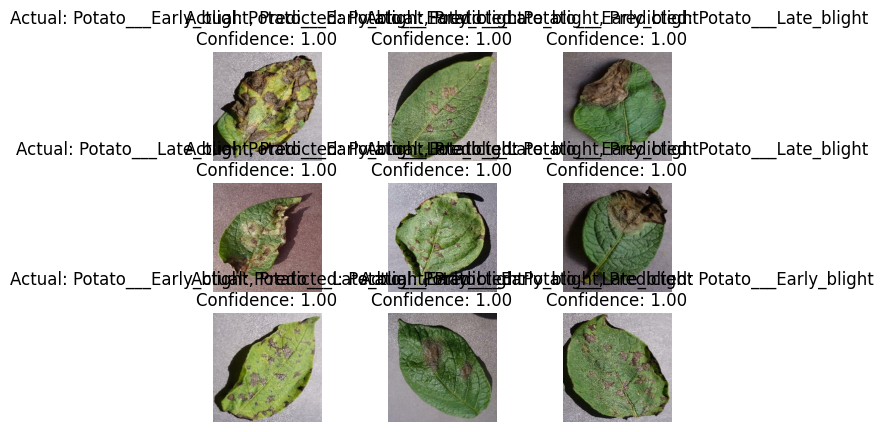

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predictions = model.predict(np.expand_dims(images[i], axis=0))
        predicted_class = np.argmax(predictions)
        confidence = np.max(predictions)  # Get the highest probability

        true_label = class_names[labels[i]]
        predicted_label = class_names[predicted_class]

        plt.title(f"Actual: {true_label}, Predicted: {predicted_label}\nConfidence: {confidence:.2f}")
        plt.axis("off")

plt.show()

In [ ]:
model_version = 1
model_save_path = f"/content/drive/MyDrive/potato/model_v{model_version}.keras"

# Save the model
model.save(model_save_path, save_format='tf')  # Explicitly set save_format='tf' if needed
print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/MyDrive/potato/model_v1.keras


In [ ]:
import tensorflow as tf

model_save_path = "/content/drive/MyDrive/potato/model_v1.keras"  # Replace with your actual path
model = tf.keras.models.load_model(model_save_path)

# ... (rest of the code) ...

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpgv1r1521'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135514576735312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576735888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576737616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576738192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576738768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576738960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576738576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576740112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576737808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576740880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135514576740304

In [ ]:
tflite_model_path = "/content/drive/MyDrive/potato/model_v1.tflite"  # Choose your desired path
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
    print(f"TensorFlow Lite model saved to: {tflite_model_path}")

TensorFlow Lite model saved to: /content/drive/MyDrive/potato/model_v1.tflite


In [ ]:
def export_labels(dataset, labels_txt_path):  # Add dataset as an argument
    class_names = dataset.class_names

    with open(labels_txt_path, 'w') as f:
        for class_name in class_names:
            f.write(class_name + '\n')
        print(f"Labels saved to: {labels_txt_path}")

# Assuming your dataset is in 'dataset' variable
dataset_path = '/content/drive/My Drive/potato'
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=256,
    batch_size=BATCH_SIZE,
)

labels_txt_path = "/content/drive/MyDrive/potato/labels.txt"
export_labels(dataset, labels_txt_path)  # Pass dataset to the function

Found 2152 files belonging to 3 classes.
Labels saved to: /content/drive/MyDrive/potato/labels.txt
